In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:/Users\P2P/Downloads/ecommerce_sample.csv")

In [4]:
print(df.head())

   Order_ID  Customer_ID Product     Category  Price  Quantity  Discount  \
0       101            1   Shoes     Footwear   1200         1        10   
1       102            2   Watch  Accessories   1500         1         5   
2       103            1   Shoes     Footwear   1200         2        10   
3       104            3  Mobile  Electronics  12000         1        15   
4       105            4     Bag         Bags    800         1         0   

  Payment_Method  Order_Date  
0            UPI  2024-01-12  
1           Card  2024-01-13  
2            UPI  2024-01-13  
3     NetBanking  2024-01-14  
4            UPI  2024-01-15  


In [5]:
print(f"\n Dataset Shape: {df.shape}")


 Dataset Shape: (8, 9)


In [6]:
df.describe()

,Order_ID,Customer_ID,Price,Quantity,Discount
count,8.00000,8.000000,8.000000,8.00000,8.000000
mean,104.50000,2.375000,8050.000000,1.25000,9.375000
std,2.44949,1.505941,15399.628938,0.46291,6.232117
min,101.00000,1.000000,800.000000,1.00000,0.000000
25%,102.75000,1.000000,1200.000000,1.00000,5.000000
50%,104.50000,2.000000,1350.000000,1.00000,10.000000
75%,106.25000,3.250000,4125.000000,1.25000,11.250000
max,108.00000,5.000000,45000.000000,2.00000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        8 non-null      int64 
 1   Customer_ID     8 non-null      int64 
 2   Product         8 non-null      object
 3   Category        8 non-null      object
 4   Price           8 non-null      int64 
 5   Quantity        8 non-null      int64 
 6   Discount        8 non-null      int64 
 7   Payment_Method  8 non-null      object
 8   Order_Date      8 non-null      object
dtypes: int64(5), object(4)
memory usage: 708.0+ bytes


In [10]:
df.isnull().sum()

Order_ID          0
Customer_ID       0
Product           0
Category          0
Price             0
Quantity          0
Discount          0
Payment_Method    0
Order_Date        0
dtype: int64

In [11]:
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna("Unknown")                    

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))


 Numeric Columns: ['Order_ID', 'Customer_ID', 'Price', 'Quantity', 'Discount']
Categorical Columns: ['Product', 'Category', 'Payment_Method', 'Order_Date']


In [14]:
df.rename(columns={
    "Order_ID": "order_id",
    "Customer_ID": "customer_id",
    "Product": "product",
    "Category": "category",
    "Price": "price",
    "Quantity": "quantity",
    "Discount": "discount",
    "Payment_Method": "payment_method",
    "Order_Date": "order_date"
}, inplace=True)

In [15]:
del df["order_id"] 

In [16]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [17]:
df[df["price"].isnull()]

,customer_id,product,category,price,quantity,discount,payment_method,order_date


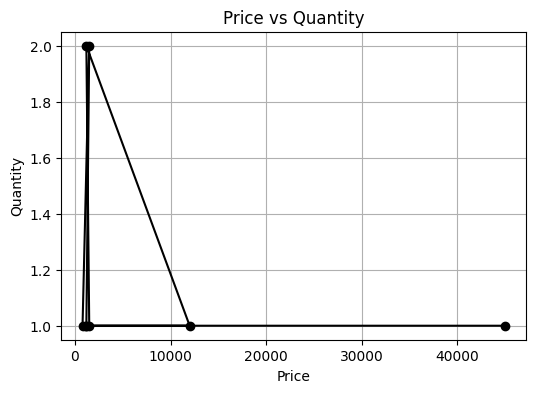

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df["price"], df["quantity"], marker='o', color='black')
plt.grid(True)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Price vs Quantity")
plt.show()


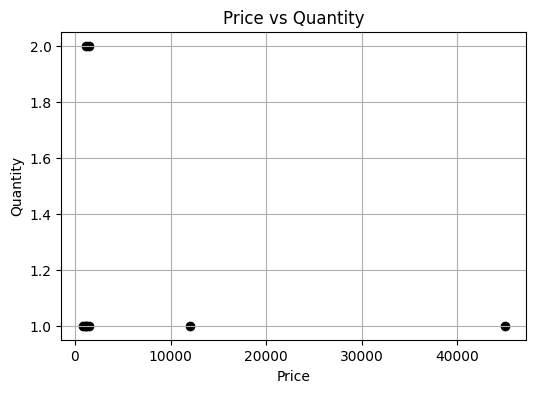

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["price"], df["quantity"], marker='o', color='black')
plt.grid(True)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Price vs Quantity")
plt.show()


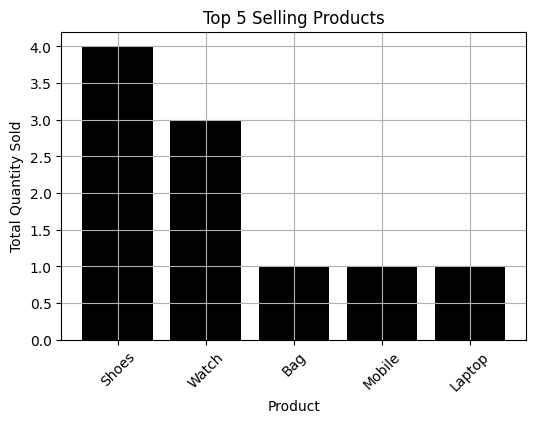

In [20]:
import matplotlib.pyplot as plt

top_products = df.groupby("product")["quantity"].sum().nlargest(5)

plt.figure(figsize=(6,4))
plt.bar(top_products.index, top_products.values, color='black')
plt.grid(True)
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Selling Products")
plt.xticks(rotation=45)
plt.show()


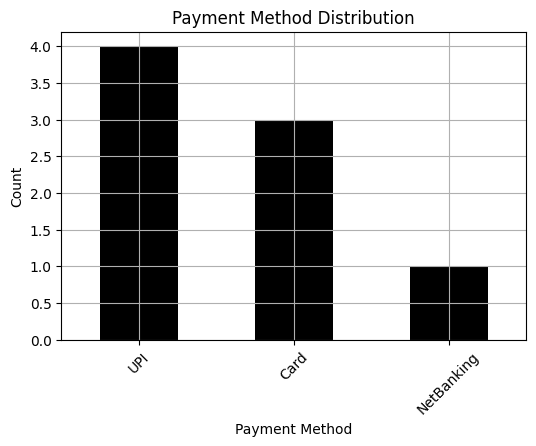

In [21]:
plt.figure(figsize=(6,4))
df["payment_method"].value_counts().plot(kind="bar", color="black")
plt.grid(True)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()


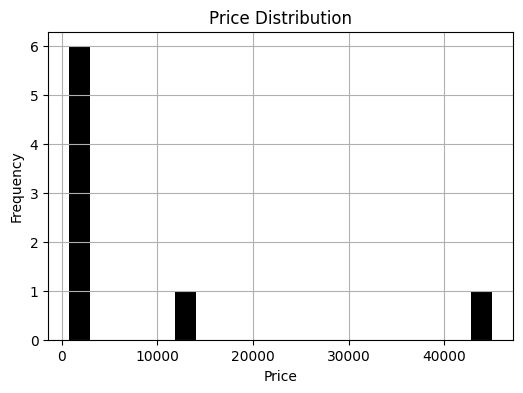

In [22]:
plt.figure(figsize=(6,4))
plt.hist(df["price"], bins=20, color="black")
plt.grid(True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
n = pd.read_csv("C:/Users\P2P/Downloads/fraud_oracle.csv/fraud_oracle.csv")

In [25]:
n.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [26]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [30]:
n.rename(columns={
    "AccidentArea": "accident_area",
    "DayOfWeek": "day",
    "DayOfWeekClaimed": "day_claimed",
    "MonthClaimed": "month_claimed",
    "WeekOfMonthClaimed": "week_claimed",
    "Make": "make",
    "Sex": "sex",
    "MaritalStatus": "marital_status",
    "AgeOfVehicle": "vehicle_age",
    "AgeOfPolicyHolder": "policy_age",
    "PoliceReportFiled": "police_report",
    "WitnessPresent": "witness",
    "AgentType": "agent_type",
    "NumberOfSuppliments": "suppliments",
    "AddressChange_Claim": "address_change",
    "NumberOfCars": "cars_owned",
    "BasePolicy": "base_policy"
}, inplace=True)


In [31]:
n.columns[n.isnull().any()]


Index([], dtype='object')

In [32]:
n.isnull().sum()


Month                   0
WeekOfMonth             0
day                     0
make                    0
accident_area           0
day_claimed             0
month_claimed           0
week_claimed            0
sex                     0
marital_status          0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
vehicle_age             0
policy_age              0
police_report           0
witness                 0
agent_type              0
suppliments             0
address_change          0
cars_owned              0
Year                    0
base_policy             0
dtype: int64

In [33]:
n[n["police_report"].isnull()]


,Month,WeekOfMonth,day,make,accident_area,day_claimed,month_claimed,week_claimed,sex,marital_status,...,vehicle_age,policy_age,police_report,witness,agent_type,suppliments,address_change,cars_owned,Year,base_policy


In [34]:
n["vehicle_age"].fillna(n["vehicle_age"].mode()[0], inplace=True)


In [35]:
n["policy_age"].fillna(n["policy_age"].mode()[0], inplace=True)


In [36]:
n["cars_owned"].fillna(n["cars_owned"].mode()[0], inplace=True)


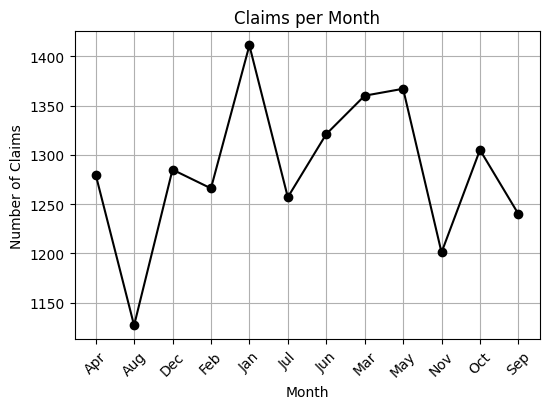

In [37]:
import matplotlib.pyplot as plt

month_counts = n["Month"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.plot(month_counts.index, month_counts.values, marker='o', color='black')
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.title("Claims per Month")
plt.xticks(rotation=45)
plt.show()


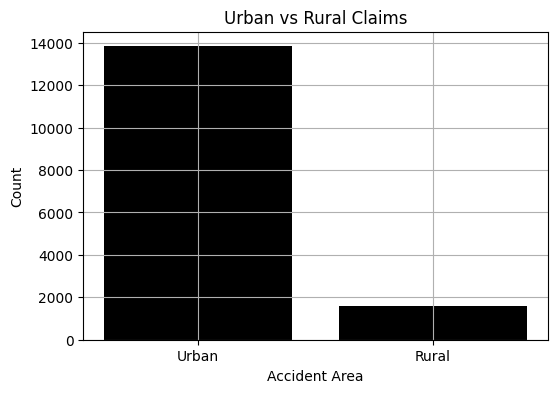

In [38]:
counts = n["accident_area"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color='black')
plt.grid(True)
plt.xlabel("Accident Area")
plt.ylabel("Count")
plt.title("Urban vs Rural Claims")
plt.show()


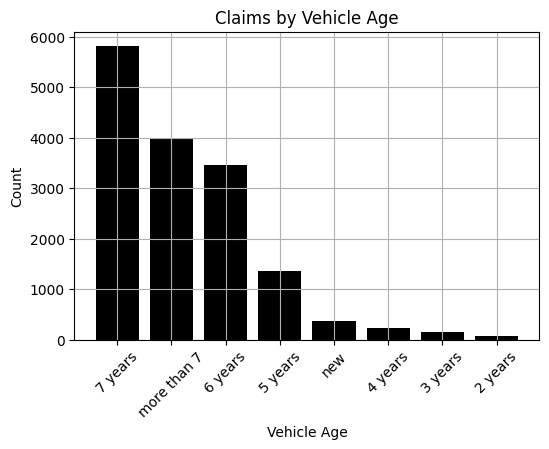

In [40]:
age_counts = n["vehicle_age"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(age_counts.index, age_counts.values, color='black')
plt.grid(True)
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.title("Claims by Vehicle Age")
plt.xticks(rotation=45)
plt.show()


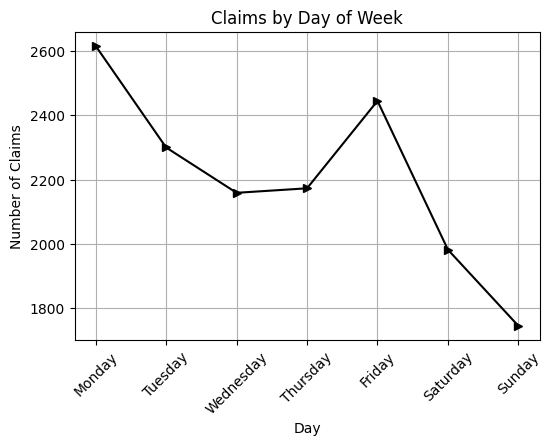

In [42]:
day_counts = n["day"].value_counts().loc[
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
]

plt.figure(figsize=(6,4))
plt.plot(day_counts.index, day_counts.values, marker='>', color='black')
plt.grid(True)
plt.xlabel("Day")
plt.ylabel("Number of Claims")
plt.title("Claims by Day of Week")
plt.xticks(rotation=45)
plt.show()


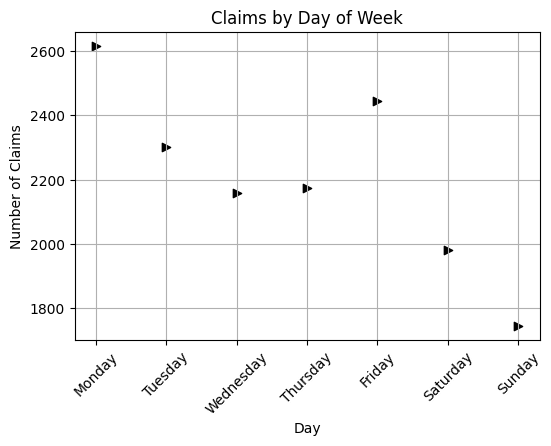

In [43]:
day_counts = n["day"].value_counts().loc[
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
]

plt.figure(figsize=(6,4))
plt.scatter(day_counts.index, day_counts.values, marker='>', color='black')
plt.grid(True)
plt.xlabel("Day")
plt.ylabel("Number of Claims")
plt.title("Claims by Day of Week")
plt.xticks(rotation=45)
plt.show()
